In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data=pd.read_csv("pricing.csv")
data

Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2                    Silver                     0             3.99   
3                   Regular                    67             4.31   
4                   Regular                    74             3.77   
..                      ...                   ...              ...   
995                    Gold                    24             4.21   
996                 Regular                    92             4.55   
997                    Gold                    80             4.13   
998                 Regular                    78             3.63   
999                    Gold                    14             4.21   

    Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0             Night      Premium                      90   
1           Evening      Economy                      43   
2         Afternoon      Premium                      76   
3         Afternoon      Premium                     134   
4         Afternoon      Economy                     149   
..              ...          ...                     ...   
995         Morning      Premium                      11   
996         Morning      Premium                      94   
997           Night      Premium                      40   
998           Night      Premium                      58   
999       Afternoon      Economy                     147   

     Historical_Cost_of_Ride  
0                 284.257273  
1                 173.874753  
2                 329.795469  
3                 470.201232  
4                 579.681422  
..                       ...  
995                91.389526  
996               424.155987  
997               157.364830  
998               279.095048  
999               655.065106  

[1000 rows x 10 columns]

In [3]:
data.describe()

Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.870000                59.75000               221.365202  
50%           4.270000               102.00000               362.019426  
75%           4.632500               143.00000               510.497504  
max           5.000000               180.00000               836.116419

In [4]:
fig=px.scatter(data,x="Expected_Ride_Duration",y="Historical_Cost_of_Ride",trendline="ols",title="Cost of ride vs duration.")
fig.update_layout(width=1000,height=800)

fig.write_image("Cost of ride vs duration.png")

fig.show()
# Rides with higher ride duration tend to cost more

In [5]:
fig=px.box(data,x="Vehicle_Type",y="Historical_Cost_of_Ride",title="Ride cost vs car type.")
fig.update_layout(width=1000,height=800)

fig.write_image("Ride cost vs car type.png")

fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9476\2756422285.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



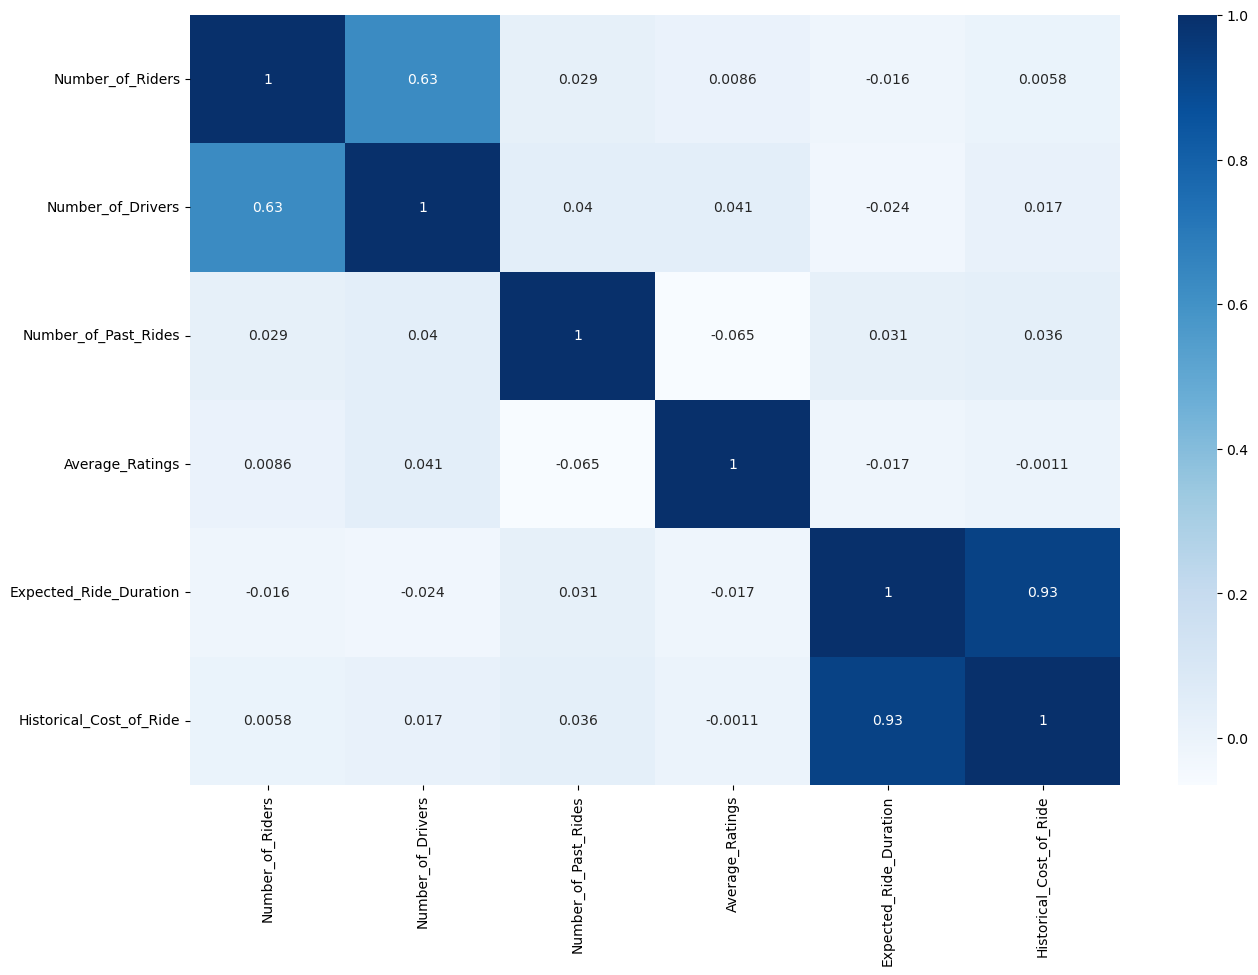

In [6]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,cmap="Blues")

plt.savefig("Correlation matrix.")

In [7]:
# Implementing the dynamic pricing strategy to adjust ride cost dynamically based on demmand and supply levels.

In [35]:
high_demand_percentile=75
low_demand_percentile=25

# Demand multiplier.
data["demand_multiplier"]=np.where(data["Number_of_Riders"] > np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],high_demand_percentile),
                                   data["Number_of_Riders"] / np.percentile(data["Number_of_Riders"],low_demand_percentile))

high_demand_percentile_value = np.percentile(data["Number_of_Riders"], high_demand_percentile)
low_demand_percentile_value=np.percentile(data["Number_of_Riders"],low_demand_percentile)

print("High rider demand:",high_demand_percentile_value)
print("Low rider demand:",low_demand_percentile_value)

# Supply multiplier.
high_supply_percentile=75
low_supply_percentile=25
data["supply_multiplier"]=np.where(data["Number_of_Drivers"] > np.percentile(data["Number_of_Drivers"],low_supply_percentile),
                                   np.percentile(data["Number_of_Drivers"],high_supply_percentile) / data["Number_of_Drivers"],
                                   np.percentile(data["Number_of_Drivers"],low_supply_percentile) /data["Number_of_Drivers"])

high_supply_percentile_value=np.percentile(data["Number_of_Drivers"],high_supply_percentile)
low_supply_percentile_value=np.percentile(data["Number_of_Drivers"],low_supply_percentile)

print("High supply demand:",high_supply_percentile_value)
print("Low supply demand:",low_supply_percentile_value)

#Defining price adjusment factors for high and low demand and supply.
demand_threshold_high= 1.2
demand_threshold_low=0.8
supply_threshold_high=0.8
supply_threshold_low=1.2

# Calculating adjusted ride cost for dynamic pricing.
data["adjusted_ride_cost"]=data["Historical_Cost_of_Ride"] *(np.maximum(data["demand_multiplier"],demand_threshold_low)
                                                             *np.maximum(data["supply_multiplier"],supply_threshold_high))


data

High rider demand: 81.0
Low rider demand: 40.0
High supply demand: 38.0
Low supply demand: 11.0


Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2                    Silver                     0             3.99   
3                   Regular                    67             4.31   
4                   Regular                    74             3.77   
..                      ...                   ...              ...   
995                    Gold                    24             4.21   
996                 Regular                    92             4.55   
997                    Gold                    80             4.13   
998                 Regular                    78             3.63   
999                    Gold                    14             4.21   

    Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0             Night             1                      90   
1           Evening             0                      43   
2         Afternoon             1                      76   
3         Afternoon             1                     134   
4         Afternoon             0                     149   
..              ...           ...                     ...   
995         Morning             1                      11   
996         Morning             1                      94   
997           Night             1                      40   
998           Night             1                      58   
999       Afternoon             0                     147   

     Historical_Cost_of_Ride  demand_multiplier  supply_multiplier  \
0                 284.257273           1.111111           0.844444   
1                 173.874753           1.450000           0.974359   
2                 329.795469           1.050000           1.225806   
3                 470.201232           1.098765           1.357143   
4                 579.681422           1.950000           1.727273   
..                       ...                ...                ...   
995                91.389526           0.825000           1.652174   
996               424.155987           1.037037           1.310345   
997               157.364830           1.100000           1.833333   
998               279.095048           1.325000           1.407407   
999               655.065106           1.950000           0.603175   

     adjusted_ride_cost  profit_percentage  
0            266.710528          -6.172840  
1            245.653817          41.282051  
2            424.478684          28.709677  
3            701.155452          49.118166  
4           1952.472427         236.818182  
..                  ...                ...  
995          124.567897          36.304348  
996          576.375440          35.887612  
997          317.352408         101.666667  
998          520.460581          86.481481  
999         1021.901565          56.000000  

[1000 rows x 14 columns]

In [38]:
# Percentage profit.
data["profit_percentage"]=((data["adjusted_ride_cost"]-data["Historical_Cost_of_Ride"])/data["Historical_Cost_of_Ride"]) * 100

# Trying to identify profitable rides.

profitable_rides=data[data["profit_percentage"] > 0]
loss_rides=data[data["profit_percentage"]<0 ]

print(profitable_rides)
print(loss_rides)

     Number_of_Riders  Number_of_Drivers Location_Category  \
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
5                  59                 35             Urban   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
1                    Silver                    72             4.06   
2                    Silver                     0             3.99   
3                   Regular                  

In [39]:
profitable_count=len(profitable_rides)
loss_count=len(loss_rides)

print("Profitable rides:",profitable_count)
print("Loss rides:",loss_count)

Profitable rides: 826
Loss rides: 173


In [13]:
labels = ["profitable_rides", "loss_rides"]
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(
    title="Ride profitability (Dynamic vs historical)",
    autosize=False,
    width=800,  
    height=600  
)
fig.write_image("Ride profitability (Dynamic vs historical).png")
fig.show()

In [14]:
fig=px.scatter(data,x="Expected_Ride_Duration",y="adjusted_ride_cost",trendline="ols",title="Adjusted cost vs ride duration.")
fig.update_layout(height=800,width=1000)

fig.write_image("Adjusted cost vs time.png")

fig.show()

In [15]:
def data_pipeline(data):
    numeric_features=data.select_dtypes(include=["float","int"]).columns
    categorical_features=data.select.dtypes(include=["object"]).columns
    data[numeric_features]=data[numeric_features].fillna(data[numeric_features].mean())
    for feature in numeric_features:
        Q1=data[feature].quantile(0.25)
        Q3=data[feature].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5 * IQR)
        upper_bound=Q3-(1.5 * IQR)

        data[feature]=np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                               data([feature].mean(),data[feature]))
        
        data[categorical_features]=data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

In [16]:
data["Vehicle_Type"]=data["Vehicle_Type"].map({"Premium":1,"Economy":0})

In [17]:
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)



RandomForestRegressor()

In [18]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric
  

In [19]:
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [273.50249247]


In [20]:
y_pred = model.predict(x_test)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.flatten(),
    y=y_pred,
    mode='markers',
    name='Actual vs Predicted'
))

fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True,
    width=1000,height=800,
)
fig.write_image("Actuals vs predictions.png")
fig.show()